## Importer data

In [34]:
import matplotlib.pyplot as plt
import pandas
data = pandas.read_csv('data.csv', ';')
data

,SampleDate,Copenhagen,Aarhus,Gentofte,Rudersdal
0,26-02-2020,0,0,0,0
1,27-02-2020,1,0,0,0
2,28-02-2020,0,1,0,0
3,01-03-2020,1,0,0,0
4,02-03-2020,1,0,0,0
...,...,...,...,...,...
400,02-04-2021,90,33,7,9
401,03-04-2021,90,41,6,8
402,04-04-2021,94,23,6,3
403,05-04-2021,22,0,2,1


## Lad os se en bar graf over tallene.
vi nøjes med de sidste 3 uger.

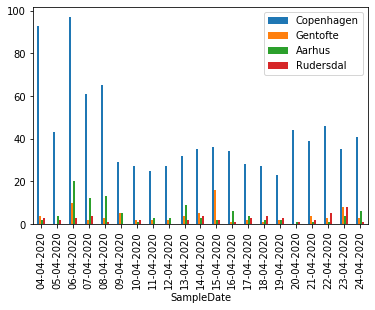

In [5]:
data.tail(21).plot(y=['Copenhagen', 'Gentofte', 'Aarhus', 'Rudersdal'], x='SampleDate', kind='bar')
plt.show()

## Vis en pie-chart med tal for byerne.
Det fordrer en summering af hver kolonne.

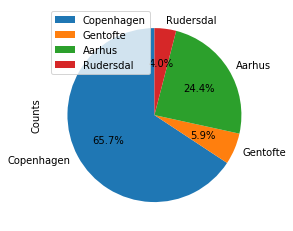

In [45]:
# Vi summerer kolonnerne (axis = 0)
sums = data.sum(axis=0)

# Opret ny dataframe med sum for hver by.
cityValue = pandas.DataFrame([sums.Copenhagen, sums.Gentofte, sums.Aarhus, sums.Rudersdal], columns=['Counts'],index=['Copenhagen', 'Gentofte', 'Aarhus', 'Rudersdal'] )

# Vis piechart med sum og procent.
cityValue.plot.pie(y='Counts', autopct='%1.1f%%', startangle=90)


## Vis udvikling over tid i series graf.
Alle data medtages.

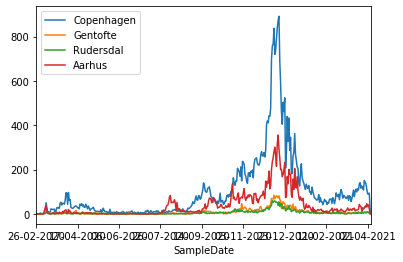

In [48]:
data.plot(x='SampleDate', y=['Copenhagen', 'Gentofte', 'Rudersdal', 'Aarhus'])

## Boxplot med data
Heraf ses bl.a., at de øvre 25 % af data er spredt ud over en stor afstand (mange smittetilfælde).

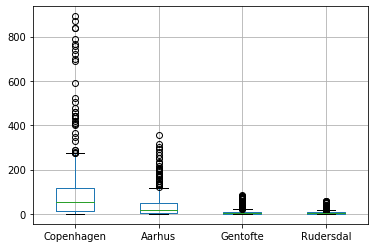

In [51]:
data.boxplot()

## TBD
Beregn t-value mv.

In [73]:
import math
signal = data.Copenhagen.mean()-data.Aarhus.mean()
print(signal)

variance_copenhagen = data.Copenhagen.std()**2
variance_aarhus = data.Aarhus.std()**2

noise = math.sqrt((variance_copenhagen/data.Copenhagen.sum()) + (variance_aarhus / data.Aarhus.sum()))
print(noise)

t_value = signal / noise
print(t_value)

data.describe()


65.20987654320987
0.8796830780825533
74.12882908393321


,Copenhagen,Aarhus,Gentofte,Rudersdal
count,405.000000,405.000000,405.000000,405.000000
mean,103.718519,38.508642,9.232099,6.340741
std,152.718663,58.390738,14.693585,10.139739
min,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,1.000000,1.000000
50%,55.000000,16.000000,4.000000,3.000000
75%,118.000000,50.000000,10.000000,7.000000
max,892.000000,356.000000,85.000000,60.000000
